In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from skimage import io
import scipy.stats
##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2571,00012891_008.png,Mass,8,12891,052Y,M,PA,2992,2991,0.143,0.143
2526,00012681_049.png,No Finding,49,12681,060Y,F,AP,2500,2048,0.168,0.168
1878,00009890_002.png,Pneumothorax,2,9890,055Y,M,PA,2500,2048,0.168,0.168


In [3]:
## EDA
# Todo 
all_xray_df.describe(include='all')

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120,112120,112120.000000,112120.000000,112120.000000,112120,112120,112120.000000,112120.000000,112120.000000,112120.000000,0.0
unique,112120,836,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,00005821_006.png,No Finding,NaN,NaN,NaN,M,PA,NaN,NaN,NaN,NaN,NaN
freq,1,60361,NaN,NaN,NaN,63340,67310,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.573751,14346.381743,46.901463,NaN,NaN,2646.078844,2486.438842,0.155649,0.155649,NaN
std,NaN,NaN,15.406320,8403.876972,16.839923,NaN,NaN,341.246429,401.268227,0.016174,0.016174,NaN
min,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,1143.000000,966.000000,0.115000,0.115000,NaN
25%,NaN,NaN,0.000000,7310.750000,35.000000,NaN,NaN,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,NaN,NaN,3.000000,13993.000000,49.000000,NaN,NaN,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,NaN,NaN,10.000000,20673.000000,59.000000,NaN,NaN,2992.000000,2991.000000,0.168000,0.168000,NaN


In [4]:
all_xray_df['Finding Labels'].unique()

array(['Cardiomegaly', 'Cardiomegaly|Emphysema', 'Cardiomegaly|Effusion',
       'No Finding', 'Hernia', 'Hernia|Infiltration', 'Mass|Nodule',
       'Infiltration', 'Effusion|Infiltration', 'Nodule', 'Emphysema',
       'Effusion', 'Atelectasis', 'Effusion|Mass',
       'Emphysema|Pneumothorax', 'Pleural_Thickening',
       'Effusion|Emphysema|Infiltration|Pneumothorax',
       'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax',
       'Effusion|Pneumonia|Pneumothorax', 'Pneumothorax',
       'Effusion|Infiltration|Pneumothorax', 'Infiltration|Mass',
       'Infiltration|Mass|Pneumothorax', 'Mass',
       'Cardiomegaly|Infiltration|Mass|Nodule',
       'Cardiomegaly|Effusion|Emphysema|Mass',
       'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax',
       'Emphysema|Mass', 'Emphysema|Mass|Pneumothorax',
       'Atelectasis|Pneumothorax', 'Cardiomegaly|Emphysema|Pneumothorax',
       'Mass|Pleural_Thickening', 'Cardiomegaly|Mass|Pleural_Thickening',
       'Effusion|Infiltra

In [5]:
all_xray_df.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN


In [6]:
print(all_xray_df['View Position'].unique())
all_xray_df[all_xray_df['View Position']=='AP'].head()

['PA' 'AP']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,NaN
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,NaN
15,00000005_002.png,No Finding,2,5,69,F,AP,2500,2048,0.168,0.168,NaN
33,00000011_005.png,Infiltration,5,11,75,M,AP,2500,2048,0.168,0.168,NaN
39,00000013_001.png,Emphysema|Pneumothorax,1,13,60,M,AP,3056,2544,0.139,0.139,NaN


#### Patient Id and Follow-up#
1. Each patient has serveral X-Rays images.
2. The order of X-Rays image for each patient is in follow-up column. And the finding labels are diffenrent between follow-up#

#### View Position
There are 2 view position AP and PA. The image from diferent position are diferent. It will afffect the model.<br> 
Should pass in the view Postition to the model
1. PA (Posteroanterior) View:
- Position: The patient stands or sits upright with their chest pressed against the X-ray film or detector, and the X-ray beam passes from the back (posterior) to the front (anterior).
- Image Quality: The heart and lungs appear more accurate in size because they are closer to the detector, and the X-ray beam has less divergence by the time it reaches the film.
- Advantages: More accurate representation of heart size (less magnification). Better image of lung fields.
2. AP (Anteroposterior) View:
- Position: The patient usually lies down (often in a bed), and the X-ray beam passes from the front (anterior) to the back (posterior). The detector is behind the patient.
- Image Quality: The heart and mediastinum appear larger and more magnified because they are farther from the detector and the X-ray beam diverges more.
- Disadvantages: Overestimation of heart size due to magnification. Suboptimal visualization of lung fields and diaphragm.

In [3]:
## Here I'm just going to split up my "Finding Labels" column so that I have one column in my dataframe
# per disease, with a binary flag. This makes EDA a lot easier! 

all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
92881,00023176_009.png,No Finding,9,23176,79,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
94197,00023994_000.png,No Finding,0,23994,22,M,PA,2454,2581,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19849,00005288_010.png,Edema,10,5288,48,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
all_xray_df[all_labels].sum()/len(all_xray_df)

Atelectasis           0.103095
Cardiomegaly          0.024759
Consolidation         0.041625
Edema                 0.020540
Effusion              0.118775
Emphysema             0.022440
Fibrosis              0.015037
Hernia                0.002025
Infiltration          0.177435
Mass                  0.051570
No Finding            0.538361
Nodule                0.056466
Pleural_Thickening    0.030191
Pneumonia             0.012763
Pneumothorax          0.047289
dtype: float64

[Text(0, 0.5, 'Number of Images with Label')]

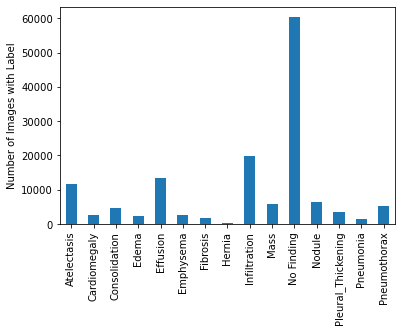

In [9]:
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

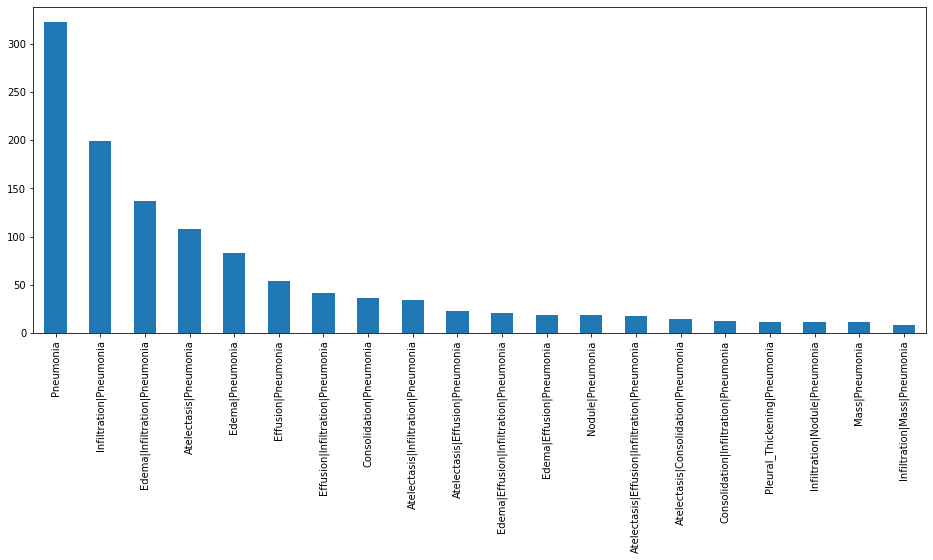

In [10]:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df['Pneumonia']==1]['Finding Labels'].value_counts()[0:20].plot(kind='bar')

#### Finding Labels
1. 'No Finding' is the most common occurrence. 'No Finding' can never appear with any other label by definition, so we know that in 53.8% of this dataset, there is no finding in the image.
2. Beyond that, it appears that 'Infiltration' is the most common disease-related label, and it is followed by 'Effusion' and 'Atelectasis.'
3. Pneumonia is often go with Infiltration, Edema, Atelectasis and Effusion
4. 1.3% total image is Pneumonia

In [11]:
all_xray_df[all_xray_df['Patient Age']>=122]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
all_xray_df[all_xray_df['Patient ID']==5567]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20853,00005567_001.png,Effusion,1,5567,53,M,AP,3056,2544,0.139000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20854,00005567_002.png,Atelectasis|Effusion|Pneumonia,2,5567,53,M,AP,3056,2544,0.139000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20855,00005567_003.png,Infiltration,3,5567,53,M,AP,3056,2544,0.139000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20856,00005567_004.png,Atelectasis,4,5567,54,M,PA,2870,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20857,00005567_005.png,Atelectasis,5,5567,54,M,PA,3056,2544,0.139000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20858,00005567_006.png,No Finding,6,5567,54,M,PA,2992,2991,0.143000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20859,00005567_007.png,Fibrosis,7,5567,57,M,PA,2021,2021,0.194311,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20860,00005567_008.png,Fibrosis,8,5567,57,M,PA,2021,2021,0.194311,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20861,00005567_009.png,No Finding,9,5567,57,M,PA,1980,2021,0.194311,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
all_xray_df[all_xray_df['Patient ID']==19346]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
max_valid_age = all_xray_df[all_xray_df['Patient Age']<122]['Patient Age'].max()
for row in all_xray_df[all_xray_df['Patient Age']>=122].itertuples():
    #print(row[4], row[5])
    patien_records = all_xray_df[(all_xray_df['Patient ID'] == row[4]) & (all_xray_df['Patient Age'] < 122)]
    max_age = patien_records['Patient Age'].max()
    if max_age == None:
        max_age = max_valid_age
    row_index = row[0]
    all_xray_df.loc[row_index,'Patient Age'] = max_age

In [5]:
(min(all_xray_df['Patient Age']), max(all_xray_df['Patient Age']))

(1.0, 95.0)

In [15]:
all_xray_df[all_xray_df['Patient Age']>=122]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1803.,  5021., 12800., 14582., 18665., 26483., 20795.,  9794.,
         1917.,   257.]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

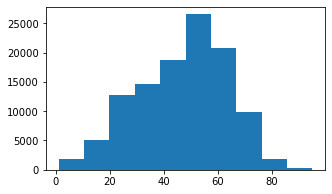

In [16]:
plt.figure(figsize=(5,3))
plt.hist(all_xray_df['Patient Age'])

(array([ 41.,  85., 174., 203., 196., 243., 267., 175.,  39.,   8.]),
 array([ 2. , 10.8, 19.6, 28.4, 37.2, 46. , 54.8, 63.6, 72.4, 81.2, 90. ]),
 <a list of 10 Patch objects>)

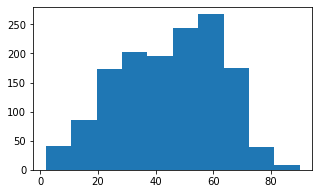

In [17]:
plt.figure(figsize=(5,3))
plt.hist(all_xray_df[all_xray_df['Pneumonia']==1]['Patient Age'])

#### Patient Age
1. Maximum age of human is 122 now. Some records has the age > 140 should be wrong
2. Seem Follow-up number does not align with the patient age. Get max valid age of patient then set to the record which has wrong age
3. Looks like the distribution of age across the whole population is slightly different than it is specifically for Pneumonia. The largest peak is around 60

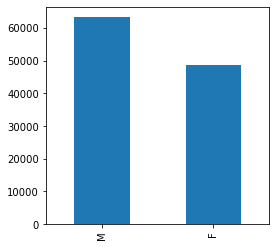

In [19]:
plt.figure(figsize=(4,4))
all_xray_df['Patient Gender'].value_counts().plot(kind='bar')

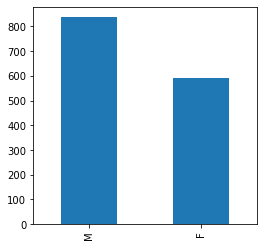

In [20]:
plt.figure(figsize=(4,4))
all_xray_df[all_xray_df['Pneumonia']==1]['Patient Gender'].value_counts().plot(kind='bar')

#### Patient Gender
There are more male than female in data set and in Pneumonia cases

Text(0.5, 1.0, 'Number of disease per image')

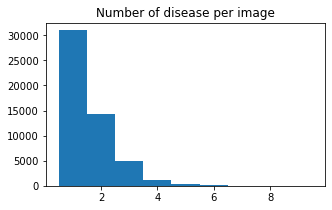

In [21]:
# Number of disease per image
summed_data = all_xray_df[all_xray_df['No Finding'] == 0][all_labels].sum(axis=1).astype(int)
bin_edges = range(summed_data.min(), summed_data.max() + 2) 
plt.figure(figsize=(5, 3))
plt.hist(summed_data, bins=bin_edges, align='left')
plt.title('Number of disease per image')

Text(0.5, 1.0, 'Number of disease per patient')

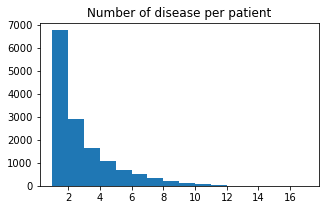

In [22]:
# Number of disease per patient
patient_group = all_xray_df[all_xray_df['No Finding'] == 0].groupby('Patient ID')[all_labels].sum()
plt.figure(figsize=(5,3))
plt.hist((patient_group > 0).sum(axis=1), bins=range(1,18))
plt.title('Number of disease per patient')

Almost X-rays image only have 1 disease<br>
Almost patients has 1 disease

In [26]:
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [14]:
all_image_paths = {os.path.basename(x): x for x in glob(os.path.join('/data', 'images*', '*', '*.png'))}
sample_df['path'] = sample_df['Image Index'].map(all_image_paths.get)
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,/data/images_001/images/00000013_005.png
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000013_026.png
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000017_001.png
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000030_001.png
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/data/images_001/images/00000032_001.png


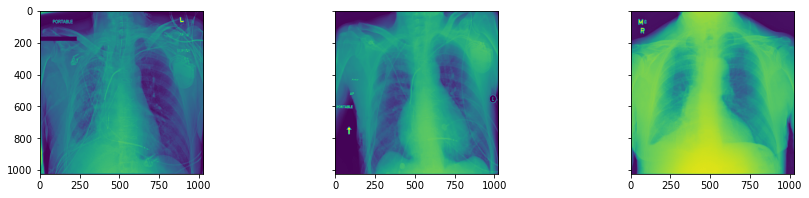

In [6]:
img1= io.imread('/data/images_001/images/00000013_005.png')
img2= io.imread('/data/images_001/images/00000013_026.png')
img3= io.imread('/data/images_001/images/00000017_001.png')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)

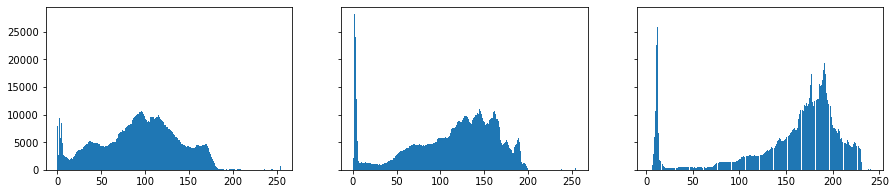

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.hist(img1.ravel(),bins=256)
ax2.hist(img2.ravel(),bins=256)
ax3.hist(img3.ravel(),bins=256)
plt.show()

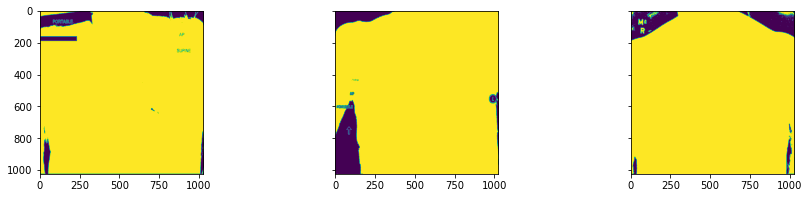

In [15]:
thresh = 12
thresh1 = 250
img1_bin = ((img1 > thresh)&(img1 < thresh1)) * 255
img2_bin = ((img2 > thresh)&(img2 < thresh1)) * 255
img3_bin = ((img3 > thresh)&(img3 < thresh1)) * 255
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.imshow(img1_bin)
ax2.imshow(img2_bin)
ax3.imshow(img3_bin)

#### Background segmentation
It's difficult to do background segmentation as the lung has same color as back ground

In [13]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
sample_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
sample_df[sample_df['Finding Labels'] == 'Pneumonia'][['path','View Position']].head(5)



,path,View Position
1631,/data/images_004/images/00008470_008.png,AP
2286,/data/images_006/images/00011702_043.png,AP
2422,/data/images_006/images/00012158_025.png,PA
2522,/data/images_006/images/00012667_000.png,PA
2534,/data/images_006/images/00012733_000.png,PA


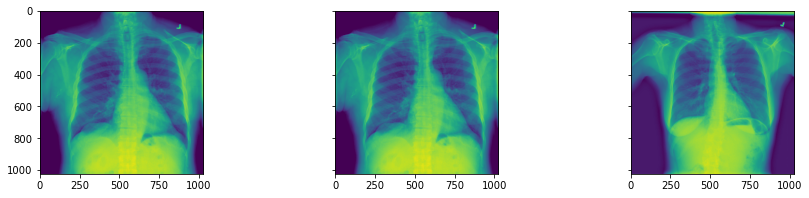

In [23]:
img1= io.imread('/data/images_006/images/00012733_000.png')
img2= io.imread('/data/images_006/images/00012733_000.png')
img3= io.imread('/data/images_006/images/00012158_025.png')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
plt.show()

In [15]:
sample_df[sample_df['Finding Labels'] == 'No Finding'][['path','View Position']].head()

,path,View Position
2,/data/images_001/images/00000017_001.png,AP
6,/data/images_001/images/00000042_002.png,AP
7,/data/images_001/images/00000057_001.png,AP
9,/data/images_001/images/00000061_019.png,AP
12,/data/images_001/images/00000080_005.png,PA


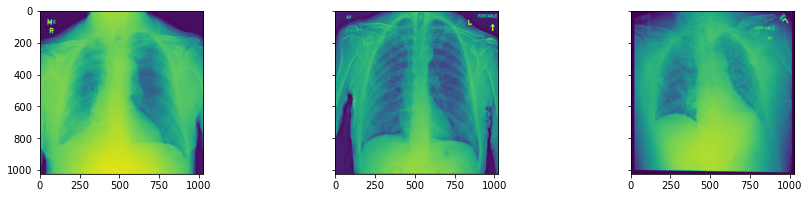

In [12]:
img1= io.imread('/data/images_001/images/00000017_001.png')
img2= io.imread('/data/images_001/images/00000042_002.png')
img3= io.imread('/data/images_001/images/00000057_001.png')
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
plt.show()

In [16]:
#img_dict = {key: [] for key in all_labels}
healthy_imgs = []
disease_imgs = []
for index, row in sample_df[sample_df['No Finding'] == 1].head(100).iterrows():
    img = io.imread(row['path'])
    img_mask = (img > thresh) & (img < thresh1)
    healthy_imgs.extend(img[img_mask].tolist())
    
for index, row in sample_df[sample_df['No Finding'] == 0].head(100).iterrows():
    img = io.imread(row['path'])
    img_mask = (img > thresh) & (img < thresh1)
    disease_imgs.extend(img[img_mask].tolist())

In [20]:
Pneumonia = []
for index, row in sample_df[sample_df['Pneumonia'] == 1].head(100).iterrows():
    img = io.imread(row['path'])
    img_mask = (img > thresh) & (img < thresh1)
    Pneumonia.extend(img[img_mask].tolist())
    
Atelectasis = []
for index, row in sample_df[sample_df['Atelectasis'] == 1].head(100).iterrows():
    img = io.imread(row['path'])
    img_mask = (img > thresh) & (img < thresh1)
    Atelectasis.extend(img[img_mask].tolist())
    

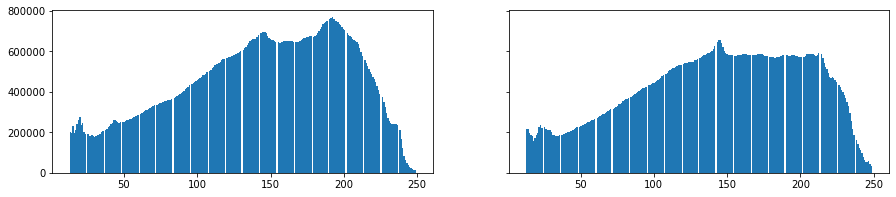

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.hist(healthy_imgs,bins=256)
ax2.hist(disease_imgs,bins=256)
plt.show()  

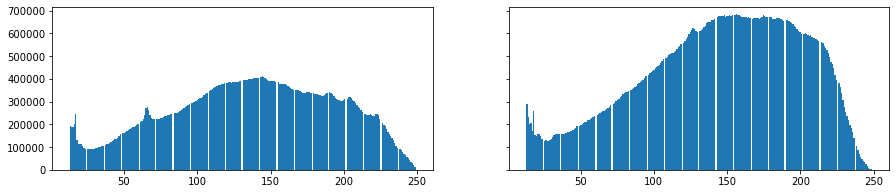

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.hist(Pneumonia,bins=256)
ax2.hist(Atelectasis,bins=256)
plt.show()  

In [24]:
Infiltration = []
for index, row in sample_df[sample_df['Infiltration'] == 1].head(100).iterrows():
    img = io.imread(row['path'])
    img_mask = (img > thresh) & (img < thresh1)
    Infiltration.extend(img[img_mask].tolist())
    
Edema = []
for index, row in sample_df[sample_df['Edema'] == 1].head(100).iterrows():
    img = io.imread(row['path'])
    img_mask = (img > thresh) & (img < thresh1)
    Edema.extend(img[img_mask].tolist())

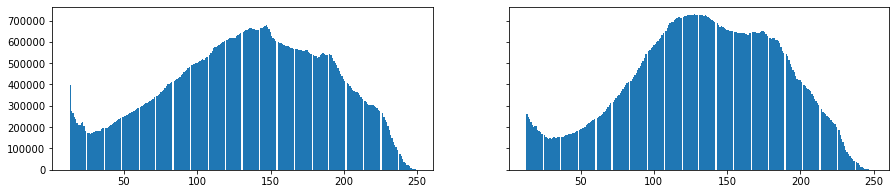

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.hist(Infiltration,bins=256)
ax2.hist(Edema,bins=256)
plt.show()  

In [18]:
scipy.stats.mode(healthy_imgs)[0][0]

192

In [19]:
scipy.stats.mode(disease_imgs)[0][0]

145

#### Pixel-level assessments histograms of intensity values
1. There is different of intensity values between healthy and diseases images. And between Pneumonia vs Atelectasis. The healthy image is brighter than diseases images
2. Compare visualize medical images between healthy case and Pneumonia case, we can see that lung of Pneumonia case are darker than lung of healthy case. 
3. So the model will train to detect the lung and compare the intensity values of pixel in this area 